# Emerging Technology Assignment
### Daniel Gallagher | G00360986
***

#### The Brief
In this project you must create a web service that uses machine learning to make predictions based on the data set powerproduction available on Moodle. The goal is to produce a model that accurately predicts wind turbine power output from wind speed values, as in the data set. You must then develop a web service that will respond with predicted power values based on speed values sent as HTTP requests. 

<b>Your submission must be in the form of a git repository containing, at a minimum, the following items:</b>

- Jupyter notebook that trains a model using the data set. In the notebook you should explain your model and give an analysis of its accuracy.


- Python script that runs a web service based on the model, as above.


- Dockerfile to build and run the web service in a container.


- Standard items in a git repository such as a README. To enhance your submission, you might consider developing and comparing more than one model. Rest assured, all the above concepts will be explored in lecture videos and other materials in the coming semester.
***

#### The Dataset
The dataset for this assignment was provided to us on Learnonline. This dataset contained different windspeeds and the power which they outputted. Below is a graph of what this dataset looked like to help visualize it.

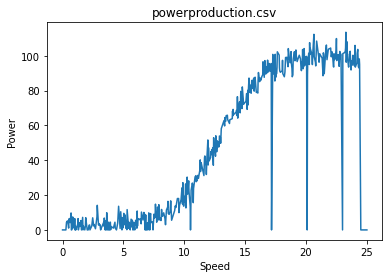

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#Importing the dataset.
powerData = pd.read_csv("powerproduction.csv")
#Plotting the dataset.
plt.title('powerproduction.csv')
plt.xlabel('Speed')
plt.ylabel('Power')
plt.plot(powerData.values[:,0], powerData.values[:,1]);

#### Graph Analysis.
It is clear from the graph that the power output is directly proportional to the wind speed in the area of the wind turbine. Also from this graph we see some outliers which will most certainly have a negative impact on our model as it will skew the data slightly. If these could be excluded it would lead to a more acurate model. An explanation for these outliers could be obstacles obstructing the turbine or could be down to wind direction or problems being encountered by the turbine itself.
***

#### My Test Model
After some research into the project and looking over past lab videos and studying the brief I began my model. The first model I started with was a simple model consisting of three layers. Two of these layers consisted of type "Sigmoid" and the final output layer consisted of type "Linear". Using this simple model helped me to get my head around the learning curve to the assignment and actually get to see a working output model allowing me to change and explore different layer types and how acurate the mixture of layers got. Using this model I got the loss down to a solid 140 which was okay but had alot of data fluctuation with this model.

#### My Actual Model
After exploring with this test model I moved onto my actual model using the knowledge I had now learned and seen first hand for myself. This is the final model I created which has good acuracy and is using a relatively low amount of epochs. The comments thorughout my model will acurately explain the code as you read down through it.

###### <u>Imports used in the model</u>
These lines of code show the imports used in the making of my model for this project.

In [2]:
#Imports which I used in this project
import tensorflow.keras as kr
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.models import Model
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import pandas as pd
import matplotlib.pyplot as plt

###### <u>Reading in the CSV file</u>
This section shows the lines of code we used to read in the CSV file we obtained from Learnonline. This data set is called "powerData"

In [3]:
#Reads in our CSV file we got from learnonline.
powerData = pd.read_csv(
    "powerproduction.csv")

###### <u>Using numpy arrays</u>
This section of code is used to set the data into Numpy arrays.

In [4]:
#Sets the now imported data set into Numpy arrays.
x = powerData.iloc[:,0].values
y = powerData.iloc[:,1].values

xArray = np.array(x)
yArray = np.array(y)

###### <u>Layers</u>
This section of code is used to create the layers we use in the model. This model uses six layers of type 'Relu' and then has an output at the end of the code chunk.

In [5]:
#Layers used to make the model all of type 'Relu' (discussed further below)
krInput = kr.Input(shape=(1,))
layer1 = Dense(10, activation='relu')(krInput)
layer2 = Dense(50, activation='relu')(layer1)
layer3 = Dense(50, activation='relu')(layer2)
layer4 = Dense(50, activation='relu')(layer3)
layer5 = Dense(50, activation='relu')(layer4)
layer6 = Dense(50, activation='relu')(layer5)
output = Dense(1)(layer6)

###### <u>Compile</u>
This is where the model is compiled together.

In [6]:
#This now compiles the created model together.
model = Model(inputs=krInput, outputs=[output])

###### <u>Ending</u>
The last few lines consist of a few different parts. The adam optimizer is used along with displaying the loss once the code is run on each epoch.
Next the data is fitted and the epoch size used is specified along with the batch size you are looking to use. Lastly the model is saved and outputted as "Output_Model.h5" which is now our finished model. Output_Model.h5 can now be used to make future predictions.


In [7]:
#Uses adam optimizer and displays the loss when run.
model.compile(optimizer='adam', loss=['mean_squared_error'])

#This now fits the data arrays and speficies the epochs and batch size used.
model.fit(xArray, yArray,epochs=6000, batch_size=500)
model.predict([1.001])

#Saves model so it can be used for making predictions.
model.save("Output_Model.h5")

Epoch 1/6000
1/1 [==============================] - 0s 419ms/step - loss: 4021.0415
Epoch 2/6000
1/1 [==============================] - 0s 3ms/step - loss: 4005.1382
Epoch 3/6000
1/1 [==============================] - 0s 4ms/step - loss: 3989.6953
Epoch 4/6000
1/1 [==============================] - 0s 4ms/step - loss: 3974.0347
Epoch 5/6000
1/1 [==============================] - 0s 4ms/step - loss: 3958.9119
Epoch 6/6000
1/1 [==============================] - 0s 4ms/step - loss: 3943.8362
Epoch 7/6000
1/1 [==============================] - 0s 4ms/step - loss: 3926.2983
Epoch 8/6000
1/1 [==============================] - 0s 4ms/step - loss: 3907.8254
Epoch 9/6000
1/1 [==============================] - 0s 4ms/step - loss: 3887.8076
Epoch 10/6000
1/1 [==============================] - 0s 5ms/step - loss: 3866.0708
Epoch 11/6000
1/1 [==============================] - 0s 3ms/step - loss: 3842.9153
Epoch 12/6000
1/1 [==============================] - 0s 3ms/step - loss: 3818.0205
Epoch 13/60

1/1 [==============================] - 0s 5ms/step - loss: 518.2501
Epoch 101/6000
1/1 [==============================] - 0s 4ms/step - loss: 517.1293
Epoch 102/6000
1/1 [==============================] - 0s 2ms/step - loss: 516.0118
Epoch 103/6000
1/1 [==============================] - 0s 3ms/step - loss: 514.9732
Epoch 104/6000
1/1 [==============================] - 0s 4ms/step - loss: 514.1439
Epoch 105/6000
1/1 [==============================] - 0s 4ms/step - loss: 513.4318
Epoch 106/6000
1/1 [==============================] - 0s 3ms/step - loss: 512.5779
Epoch 107/6000
1/1 [==============================] - 0s 4ms/step - loss: 511.8894
Epoch 108/6000
1/1 [==============================] - 0s 4ms/step - loss: 511.0795
Epoch 109/6000
1/1 [==============================] - 0s 4ms/step - loss: 510.1124
Epoch 110/6000
1/1 [==============================] - 0s 5ms/step - loss: 509.0999
Epoch 111/6000
1/1 [==============================] - 0s 4ms/step - loss: 507.9799
Epoch 112/6000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 397.8592
Epoch 199/6000
1/1 [==============================] - 0s 3ms/step - loss: 397.3130
Epoch 200/6000
1/1 [==============================] - 0s 3ms/step - loss: 396.7888
Epoch 201/6000
1/1 [==============================] - 0s 4ms/step - loss: 396.2822
Epoch 202/6000
1/1 [==============================] - 0s 3ms/step - loss: 395.7907
Epoch 203/6000
1/1 [==============================] - 0s 4ms/step - loss: 395.3115
Epoch 204/6000
1/1 [==============================] - 0s 3ms/step - loss: 394.8365
Epoch 205/6000
1/1 [==============================] - 0s 4ms/step - loss: 394.3587
Epoch 206/6000
1/1 [==============================] - 0s 3ms/step - loss: 393.8802
Epoch 207/6000
1/1 [==============================] - 0s 3ms/step - loss: 393.4107
Epoch 208/6000
1/1 [==============================] - 0s 3ms/step - loss: 393.0042
Epoch 209/6000
1/1 [==============================] - 0s 4ms/step - loss: 392.6615
Epoch 210/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 367.7035
Epoch 297/6000
1/1 [==============================] - 0s 4ms/step - loss: 367.4569
Epoch 298/6000
1/1 [==============================] - 0s 3ms/step - loss: 367.2104
Epoch 299/6000
1/1 [==============================] - 0s 4ms/step - loss: 366.9647
Epoch 300/6000
1/1 [==============================] - 0s 3ms/step - loss: 366.7191
Epoch 301/6000
1/1 [==============================] - 0s 4ms/step - loss: 366.4762
Epoch 302/6000
1/1 [==============================] - 0s 3ms/step - loss: 366.2335
Epoch 303/6000
1/1 [==============================] - 0s 3ms/step - loss: 365.9927
Epoch 304/6000
1/1 [==============================] - 0s 4ms/step - loss: 365.7505
Epoch 305/6000
1/1 [==============================] - 0s 3ms/step - loss: 365.5110
Epoch 306/6000
1/1 [==============================] - 0s 4ms/step - loss: 365.2686
Epoch 307/6000
1/1 [==============================] - 0s 4ms/step - loss: 365.0283
Epoch 308/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 346.0022
Epoch 395/6000
1/1 [==============================] - 0s 3ms/step - loss: 345.8024
Epoch 396/6000
1/1 [==============================] - 0s 4ms/step - loss: 345.5922
Epoch 397/6000
1/1 [==============================] - 0s 4ms/step - loss: 345.3838
Epoch 398/6000
1/1 [==============================] - 0s 5ms/step - loss: 345.1678
Epoch 399/6000
1/1 [==============================] - 0s 4ms/step - loss: 344.9583
Epoch 400/6000
1/1 [==============================] - 0s 7ms/step - loss: 344.7463
Epoch 401/6000
1/1 [==============================] - 0s 5ms/step - loss: 344.5395
Epoch 402/6000
1/1 [==============================] - 0s 3ms/step - loss: 344.3287
Epoch 403/6000
1/1 [==============================] - 0s 6ms/step - loss: 344.1177
Epoch 404/6000
1/1 [==============================] - 0s 6ms/step - loss: 343.9023
Epoch 405/6000
1/1 [==============================] - 0s 5ms/step - loss: 343.6883
Epoch 406/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 322.9356
Epoch 493/6000
1/1 [==============================] - 0s 5ms/step - loss: 322.6690
Epoch 494/6000
1/1 [==============================] - 0s 4ms/step - loss: 322.3766
Epoch 495/6000
1/1 [==============================] - 0s 4ms/step - loss: 322.0287
Epoch 496/6000
1/1 [==============================] - 0s 4ms/step - loss: 321.6356
Epoch 497/6000
1/1 [==============================] - 0s 4ms/step - loss: 321.3160
Epoch 498/6000
1/1 [==============================] - 0s 4ms/step - loss: 320.9839
Epoch 499/6000
1/1 [==============================] - 0s 4ms/step - loss: 320.8600
Epoch 500/6000
1/1 [==============================] - ETA: 0s - loss: 320.502 - 0s 4ms/step - loss: 320.5024
Epoch 501/6000
1/1 [==============================] - 0s 4ms/step - loss: 320.4092
Epoch 502/6000
1/1 [==============================] - 0s 4ms/step - loss: 320.3077
Epoch 503/6000
1/1 [==============================] - 0s 4ms/step - loss: 31

1/1 [==============================] - 0s 6ms/step - loss: 277.2272
Epoch 591/6000
1/1 [==============================] - 0s 5ms/step - loss: 276.6336
Epoch 592/6000
1/1 [==============================] - 0s 4ms/step - loss: 275.9601
Epoch 593/6000
1/1 [==============================] - 0s 5ms/step - loss: 275.1935
Epoch 594/6000
1/1 [==============================] - 0s 3ms/step - loss: 274.6693
Epoch 595/6000
1/1 [==============================] - 0s 4ms/step - loss: 273.8980
Epoch 596/6000
1/1 [==============================] - 0s 6ms/step - loss: 273.3404
Epoch 597/6000
1/1 [==============================] - 0s 5ms/step - loss: 272.8497
Epoch 598/6000
1/1 [==============================] - 0s 5ms/step - loss: 272.1070
Epoch 599/6000
1/1 [==============================] - 0s 5ms/step - loss: 272.1160
Epoch 600/6000
1/1 [==============================] - 0s 5ms/step - loss: 272.3790
Epoch 601/6000
1/1 [==============================] - 0s 4ms/step - loss: 271.0100
Epoch 602/6000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 229.6819
Epoch 689/6000
1/1 [==============================] - 0s 4ms/step - loss: 228.8335
Epoch 690/6000
1/1 [==============================] - 0s 3ms/step - loss: 228.8216
Epoch 691/6000
1/1 [==============================] - 0s 4ms/step - loss: 228.0764
Epoch 692/6000
1/1 [==============================] - 0s 5ms/step - loss: 227.8903
Epoch 693/6000
1/1 [==============================] - 0s 3ms/step - loss: 227.3264
Epoch 694/6000
1/1 [==============================] - 0s 4ms/step - loss: 227.1772
Epoch 695/6000
1/1 [==============================] - 0s 7ms/step - loss: 226.6395
Epoch 696/6000
1/1 [==============================] - 0s 5ms/step - loss: 226.4812
Epoch 697/6000
1/1 [==============================] - 0s 6ms/step - loss: 226.0592
Epoch 698/6000
1/1 [==============================] - 0s 4ms/step - loss: 225.7712
Epoch 699/6000
1/1 [==============================] - 0s 6ms/step - loss: 225.4439
Epoch 700/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 200.0382
Epoch 787/6000
1/1 [==============================] - 0s 3ms/step - loss: 199.8387
Epoch 788/6000
1/1 [==============================] - 0s 5ms/step - loss: 198.7170
Epoch 789/6000
1/1 [==============================] - 0s 3ms/step - loss: 199.1747
Epoch 790/6000
1/1 [==============================] - 0s 4ms/step - loss: 198.9307
Epoch 791/6000
1/1 [==============================] - 0s 4ms/step - loss: 197.6377
Epoch 792/6000
1/1 [==============================] - 0s 4ms/step - loss: 197.9377
Epoch 793/6000
1/1 [==============================] - 0s 3ms/step - loss: 197.3687
Epoch 794/6000
1/1 [==============================] - 0s 4ms/step - loss: 196.9507
Epoch 795/6000
1/1 [==============================] - 0s 3ms/step - loss: 196.3291
Epoch 796/6000
1/1 [==============================] - 0s 3ms/step - loss: 196.4529
Epoch 797/6000
1/1 [==============================] - 0s 3ms/step - loss: 195.7745
Epoch 798/6000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 168.2846
Epoch 885/6000
1/1 [==============================] - 0s 4ms/step - loss: 168.7595
Epoch 886/6000
1/1 [==============================] - 0s 3ms/step - loss: 175.1652
Epoch 887/6000
1/1 [==============================] - 0s 3ms/step - loss: 182.3868
Epoch 888/6000
1/1 [==============================] - 0s 3ms/step - loss: 200.2677
Epoch 889/6000
1/1 [==============================] - 0s 3ms/step - loss: 174.3272
Epoch 890/6000
1/1 [==============================] - 0s 4ms/step - loss: 180.7585
Epoch 891/6000
1/1 [==============================] - 0s 3ms/step - loss: 200.2573
Epoch 892/6000
1/1 [==============================] - 0s 3ms/step - loss: 180.5838
Epoch 893/6000
1/1 [==============================] - 0s 3ms/step - loss: 180.7916
Epoch 894/6000
1/1 [==============================] - 0s 3ms/step - loss: 191.2639
Epoch 895/6000
1/1 [==============================] - 0s 3ms/step - loss: 166.1129
Epoch 896/6000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 146.5560
Epoch 983/6000
1/1 [==============================] - 0s 3ms/step - loss: 146.3191
Epoch 984/6000
1/1 [==============================] - 0s 2ms/step - loss: 146.1022
Epoch 985/6000
1/1 [==============================] - 0s 3ms/step - loss: 145.9126
Epoch 986/6000
1/1 [==============================] - 0s 2ms/step - loss: 145.7734
Epoch 987/6000
1/1 [==============================] - ETA: 0s - loss: 145.627 - 0s 3ms/step - loss: 145.6276
Epoch 988/6000
1/1 [==============================] - 0s 3ms/step - loss: 145.4778
Epoch 989/6000
1/1 [==============================] - 0s 3ms/step - loss: 145.3076
Epoch 990/6000
1/1 [==============================] - 0s 3ms/step - loss: 145.1747
Epoch 991/6000
1/1 [==============================] - 0s 4ms/step - loss: 145.1019
Epoch 992/6000
1/1 [==============================] - 0s 3ms/step - loss: 144.8875
Epoch 993/6000
1/1 [==============================] - 0s 3ms/step - loss: 14

1/1 [==============================] - 0s 4ms/step - loss: 146.6340
Epoch 1080/6000
1/1 [==============================] - 0s 4ms/step - loss: 133.5210
Epoch 1081/6000
1/1 [==============================] - 0s 2ms/step - loss: 126.2651
Epoch 1082/6000
1/1 [==============================] - 0s 3ms/step - loss: 134.1730
Epoch 1083/6000
1/1 [==============================] - 0s 3ms/step - loss: 143.8963
Epoch 1084/6000
1/1 [==============================] - 0s 4ms/step - loss: 131.6403
Epoch 1085/6000
1/1 [==============================] - 0s 3ms/step - loss: 125.7302
Epoch 1086/6000
1/1 [==============================] - 0s 4ms/step - loss: 129.5559
Epoch 1087/6000
1/1 [==============================] - 0s 3ms/step - loss: 132.3998
Epoch 1088/6000
1/1 [==============================] - 0s 2ms/step - loss: 131.3265
Epoch 1089/6000
1/1 [==============================] - 0s 3ms/step - loss: 125.3433
Epoch 1090/6000
1/1 [==============================] - 0s 2ms/step - loss: 127.5235
Epoch 10

1/1 [==============================] - 0s 4ms/step - loss: 113.2866
Epoch 1177/6000
1/1 [==============================] - 0s 3ms/step - loss: 113.2549
Epoch 1178/6000
1/1 [==============================] - 0s 3ms/step - loss: 113.2259
Epoch 1179/6000
1/1 [==============================] - 0s 2ms/step - loss: 113.2578
Epoch 1180/6000
1/1 [==============================] - 0s 3ms/step - loss: 113.6085
Epoch 1181/6000
1/1 [==============================] - 0s 3ms/step - loss: 114.4224
Epoch 1182/6000
1/1 [==============================] - 0s 3ms/step - loss: 115.5793
Epoch 1183/6000
1/1 [==============================] - 0s 4ms/step - loss: 117.3195
Epoch 1184/6000
1/1 [==============================] - 0s 3ms/step - loss: 122.3291
Epoch 1185/6000
1/1 [==============================] - 0s 3ms/step - loss: 122.8823
Epoch 1186/6000
1/1 [==============================] - 0s 2ms/step - loss: 125.6665
Epoch 1187/6000
1/1 [==============================] - 0s 2ms/step - loss: 119.8517
Epoch 11

1/1 [==============================] - 0s 4ms/step - loss: 105.6081
Epoch 1274/6000
1/1 [==============================] - 0s 3ms/step - loss: 105.1013
Epoch 1275/6000
1/1 [==============================] - 0s 3ms/step - loss: 104.8700
Epoch 1276/6000
1/1 [==============================] - 0s 3ms/step - loss: 104.7570
Epoch 1277/6000
1/1 [==============================] - 0s 2ms/step - loss: 104.7107
Epoch 1278/6000
1/1 [==============================] - 0s 3ms/step - loss: 104.6969
Epoch 1279/6000
1/1 [==============================] - 0s 2ms/step - loss: 104.7387
Epoch 1280/6000
1/1 [==============================] - 0s 3ms/step - loss: 104.9038
Epoch 1281/6000
1/1 [==============================] - 0s 4ms/step - loss: 105.0547
Epoch 1282/6000
1/1 [==============================] - 0s 3ms/step - loss: 105.3301
Epoch 1283/6000
1/1 [==============================] - 0s 3ms/step - loss: 105.7509
Epoch 1284/6000
1/1 [==============================] - 0s 3ms/step - loss: 106.0249
Epoch 12

1/1 [==============================] - 0s 2ms/step - loss: 100.8650
Epoch 1371/6000
1/1 [==============================] - 0s 3ms/step - loss: 100.2428
Epoch 1372/6000
1/1 [==============================] - 0s 3ms/step - loss: 99.7190
Epoch 1373/6000
1/1 [==============================] - 0s 3ms/step - loss: 99.9425
Epoch 1374/6000
1/1 [==============================] - 0s 3ms/step - loss: 100.2981
Epoch 1375/6000
1/1 [==============================] - 0s 3ms/step - loss: 100.1501
Epoch 1376/6000
1/1 [==============================] - 0s 3ms/step - loss: 99.6967
Epoch 1377/6000
1/1 [==============================] - 0s 3ms/step - loss: 99.5230
Epoch 1378/6000
1/1 [==============================] - 0s 4ms/step - loss: 99.6550
Epoch 1379/6000
1/1 [==============================] - 0s 3ms/step - loss: 99.7845
Epoch 1380/6000
1/1 [==============================] - 0s 3ms/step - loss: 99.7352
Epoch 1381/6000
1/1 [==============================] - 0s 2ms/step - loss: 99.4401
Epoch 1382/6000


1/1 [==============================] - 0s 4ms/step - loss: 101.1197
Epoch 1469/6000
1/1 [==============================] - 0s 4ms/step - loss: 102.8754
Epoch 1470/6000
1/1 [==============================] - 0s 5ms/step - loss: 100.9247
Epoch 1471/6000
1/1 [==============================] - 0s 3ms/step - loss: 96.8853
Epoch 1472/6000
1/1 [==============================] - 0s 3ms/step - loss: 96.0773
Epoch 1473/6000
1/1 [==============================] - 0s 3ms/step - loss: 98.0608
Epoch 1474/6000
1/1 [==============================] - 0s 4ms/step - loss: 99.0340
Epoch 1475/6000
1/1 [==============================] - 0s 4ms/step - loss: 98.3890
Epoch 1476/6000
1/1 [==============================] - 0s 3ms/step - loss: 96.2945
Epoch 1477/6000
1/1 [==============================] - 0s 3ms/step - loss: 95.8050
Epoch 1478/6000
1/1 [==============================] - 0s 3ms/step - loss: 96.7697
Epoch 1479/6000
1/1 [==============================] - 0s 2ms/step - loss: 97.1331
Epoch 1480/6000
1

1/1 [==============================] - 0s 3ms/step - loss: 93.6810
Epoch 1567/6000
1/1 [==============================] - 0s 3ms/step - loss: 93.4850
Epoch 1568/6000
1/1 [==============================] - 0s 3ms/step - loss: 93.3502
Epoch 1569/6000
1/1 [==============================] - 0s 3ms/step - loss: 93.3323
Epoch 1570/6000
1/1 [==============================] - 0s 2ms/step - loss: 93.5190
Epoch 1571/6000
1/1 [==============================] - 0s 4ms/step - loss: 93.7181
Epoch 1572/6000
1/1 [==============================] - 0s 3ms/step - loss: 94.0492
Epoch 1573/6000
1/1 [==============================] - 0s 4ms/step - loss: 94.8107
Epoch 1574/6000
1/1 [==============================] - 0s 2ms/step - loss: 95.5418
Epoch 1575/6000
1/1 [==============================] - 0s 2ms/step - loss: 96.2847
Epoch 1576/6000
1/1 [==============================] - 0s 3ms/step - loss: 96.1721
Epoch 1577/6000
1/1 [==============================] - 0s 2ms/step - loss: 96.2314
Epoch 1578/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 91.2624
Epoch 1665/6000
1/1 [==============================] - 0s 3ms/step - loss: 91.3288
Epoch 1666/6000
1/1 [==============================] - 0s 2ms/step - loss: 91.4632
Epoch 1667/6000
1/1 [==============================] - 0s 3ms/step - loss: 91.8984
Epoch 1668/6000
1/1 [==============================] - 0s 3ms/step - loss: 92.4050
Epoch 1669/6000
1/1 [==============================] - 0s 3ms/step - loss: 93.0733
Epoch 1670/6000
1/1 [==============================] - 0s 3ms/step - loss: 93.7256
Epoch 1671/6000
1/1 [==============================] - 0s 3ms/step - loss: 94.7196
Epoch 1672/6000
1/1 [==============================] - 0s 3ms/step - loss: 95.1387
Epoch 1673/6000
1/1 [==============================] - 0s 3ms/step - loss: 96.2007
Epoch 1674/6000
1/1 [==============================] - 0s 3ms/step - loss: 95.9668
Epoch 1675/6000
1/1 [==============================] - 0s 3ms/step - loss: 96.1674
Epoch 1676/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 89.5178
Epoch 1763/6000
1/1 [==============================] - 0s 3ms/step - loss: 90.0555
Epoch 1764/6000
1/1 [==============================] - 0s 3ms/step - loss: 90.8194
Epoch 1765/6000
1/1 [==============================] - 0s 5ms/step - loss: 91.6389
Epoch 1766/6000
1/1 [==============================] - 0s 2ms/step - loss: 93.4150
Epoch 1767/6000
1/1 [==============================] - 0s 3ms/step - loss: 94.8476
Epoch 1768/6000
1/1 [==============================] - 0s 3ms/step - loss: 96.4187
Epoch 1769/6000
1/1 [==============================] - 0s 3ms/step - loss: 97.4275
Epoch 1770/6000
1/1 [==============================] - 0s 3ms/step - loss: 98.0743
Epoch 1771/6000
1/1 [==============================] - 0s 3ms/step - loss: 97.0703
Epoch 1772/6000
1/1 [==============================] - 0s 5ms/step - loss: 95.5612
Epoch 1773/6000
1/1 [==============================] - 0s 3ms/step - loss: 93.5055
Epoch 1774/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 87.5826
Epoch 1861/6000
1/1 [==============================] - 0s 3ms/step - loss: 87.4605
Epoch 1862/6000
1/1 [==============================] - 0s 3ms/step - loss: 87.4360
Epoch 1863/6000
1/1 [==============================] - 0s 3ms/step - loss: 87.4865
Epoch 1864/6000
1/1 [==============================] - 0s 3ms/step - loss: 87.5376
Epoch 1865/6000
1/1 [==============================] - 0s 3ms/step - loss: 87.5631
Epoch 1866/6000
1/1 [==============================] - 0s 3ms/step - loss: 87.6130
Epoch 1867/6000
1/1 [==============================] - 0s 3ms/step - loss: 87.6070
Epoch 1868/6000
1/1 [==============================] - 0s 3ms/step - loss: 87.6011
Epoch 1869/6000
1/1 [==============================] - 0s 3ms/step - loss: 87.5585
Epoch 1870/6000
1/1 [==============================] - 0s 3ms/step - loss: 87.5394
Epoch 1871/6000
1/1 [==============================] - 0s 3ms/step - loss: 87.4736
Epoch 1872/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 88.2514
Epoch 1959/6000
1/1 [==============================] - 0s 4ms/step - loss: 86.7322
Epoch 1960/6000
1/1 [==============================] - 0s 3ms/step - loss: 88.4542
Epoch 1961/6000
1/1 [==============================] - 0s 4ms/step - loss: 88.0279
Epoch 1962/6000
1/1 [==============================] - 0s 2ms/step - loss: 87.6865
Epoch 1963/6000
1/1 [==============================] - 0s 2ms/step - loss: 86.6761
Epoch 1964/6000
1/1 [==============================] - 0s 2ms/step - loss: 87.9706
Epoch 1965/6000
1/1 [==============================] - 0s 4ms/step - loss: 87.8559
Epoch 1966/6000
1/1 [==============================] - 0s 4ms/step - loss: 87.1830
Epoch 1967/6000
1/1 [==============================] - 0s 4ms/step - loss: 86.6857
Epoch 1968/6000
1/1 [==============================] - 0s 2ms/step - loss: 87.6290
Epoch 1969/6000
1/1 [==============================] - 0s 3ms/step - loss: 87.4214
Epoch 1970/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 85.7666
Epoch 2057/6000
1/1 [==============================] - 0s 3ms/step - loss: 85.6757
Epoch 2058/6000
1/1 [==============================] - 0s 2ms/step - loss: 85.5216
Epoch 2059/6000
1/1 [==============================] - 0s 3ms/step - loss: 85.3850
Epoch 2060/6000
1/1 [==============================] - 0s 3ms/step - loss: 85.3030
Epoch 2061/6000
1/1 [==============================] - 0s 3ms/step - loss: 85.3004
Epoch 2062/6000
1/1 [==============================] - 0s 3ms/step - loss: 85.2754
Epoch 2063/6000
1/1 [==============================] - 0s 4ms/step - loss: 85.3110
Epoch 2064/6000
1/1 [==============================] - 0s 3ms/step - loss: 85.3455
Epoch 2065/6000
1/1 [==============================] - 0s 3ms/step - loss: 85.4324
Epoch 2066/6000
1/1 [==============================] - 0s 4ms/step - loss: 85.5221
Epoch 2067/6000
1/1 [==============================] - 0s 3ms/step - loss: 85.7965
Epoch 2068/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 89.8915
Epoch 2155/6000
1/1 [==============================] - 0s 2ms/step - loss: 88.6739
Epoch 2156/6000
1/1 [==============================] - 0s 3ms/step - loss: 88.3033
Epoch 2157/6000
1/1 [==============================] - 0s 3ms/step - loss: 86.5270
Epoch 2158/6000
1/1 [==============================] - 0s 4ms/step - loss: 85.7960
Epoch 2159/6000
1/1 [==============================] - 0s 4ms/step - loss: 84.9582
Epoch 2160/6000
1/1 [==============================] - 0s 3ms/step - loss: 84.5516
Epoch 2161/6000
1/1 [==============================] - 0s 2ms/step - loss: 84.3289
Epoch 2162/6000
1/1 [==============================] - 0s 3ms/step - loss: 84.3288
Epoch 2163/6000
1/1 [==============================] - 0s 3ms/step - loss: 84.4598
Epoch 2164/6000
1/1 [==============================] - 0s 2ms/step - loss: 84.8453
Epoch 2165/6000
1/1 [==============================] - 0s 3ms/step - loss: 85.3050
Epoch 2166/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 84.5303
Epoch 2253/6000
1/1 [==============================] - 0s 3ms/step - loss: 84.8843
Epoch 2254/6000
1/1 [==============================] - 0s 2ms/step - loss: 85.5168
Epoch 2255/6000
1/1 [==============================] - 0s 3ms/step - loss: 85.9137
Epoch 2256/6000
1/1 [==============================] - 0s 2ms/step - loss: 86.8975
Epoch 2257/6000
1/1 [==============================] - 0s 3ms/step - loss: 86.8868
Epoch 2258/6000
1/1 [==============================] - 0s 3ms/step - loss: 87.8369
Epoch 2259/6000
1/1 [==============================] - 0s 3ms/step - loss: 87.2704
Epoch 2260/6000
1/1 [==============================] - 0s 4ms/step - loss: 88.0053
Epoch 2261/6000
1/1 [==============================] - 0s 3ms/step - loss: 86.9637
Epoch 2262/6000
1/1 [==============================] - 0s 2ms/step - loss: 87.1135
Epoch 2263/6000
1/1 [==============================] - 0s 3ms/step - loss: 86.1094
Epoch 2264/6000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 84.8625
Epoch 2351/6000
1/1 [==============================] - 0s 3ms/step - loss: 84.3358
Epoch 2352/6000
1/1 [==============================] - 0s 3ms/step - loss: 84.3001
Epoch 2353/6000
1/1 [==============================] - 0s 3ms/step - loss: 84.1882
Epoch 2354/6000
1/1 [==============================] - 0s 2ms/step - loss: 84.5220
Epoch 2355/6000
1/1 [==============================] - 0s 3ms/step - loss: 84.6186
Epoch 2356/6000
1/1 [==============================] - 0s 4ms/step - loss: 85.2034
Epoch 2357/6000
1/1 [==============================] - 0s 2ms/step - loss: 85.3080
Epoch 2358/6000
1/1 [==============================] - 0s 4ms/step - loss: 85.9439
Epoch 2359/6000
1/1 [==============================] - 0s 2ms/step - loss: 85.5683
Epoch 2360/6000
1/1 [==============================] - 0s 3ms/step - loss: 86.1157
Epoch 2361/6000
1/1 [==============================] - 0s 3ms/step - loss: 85.4556
Epoch 2362/6000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 84.7219
Epoch 2449/6000
1/1 [==============================] - 0s 3ms/step - loss: 83.9968
Epoch 2450/6000
1/1 [==============================] - 0s 3ms/step - loss: 83.7292
Epoch 2451/6000
1/1 [==============================] - 0s 3ms/step - loss: 83.2691
Epoch 2452/6000
1/1 [==============================] - 0s 2ms/step - loss: 83.2506
Epoch 2453/6000
1/1 [==============================] - 0s 3ms/step - loss: 83.1578
Epoch 2454/6000
1/1 [==============================] - 0s 4ms/step - loss: 83.4669
Epoch 2455/6000
1/1 [==============================] - 0s 3ms/step - loss: 83.6130
Epoch 2456/6000
1/1 [==============================] - 0s 3ms/step - loss: 84.2593
Epoch 2457/6000
1/1 [==============================] - 0s 3ms/step - loss: 84.4755
Epoch 2458/6000
1/1 [==============================] - 0s 3ms/step - loss: 85.6044
Epoch 2459/6000
1/1 [==============================] - 0s 3ms/step - loss: 85.5487
Epoch 2460/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 83.0885
Epoch 2547/6000
1/1 [==============================] - 0s 2ms/step - loss: 82.7615
Epoch 2548/6000
1/1 [==============================] - 0s 3ms/step - loss: 82.9732
Epoch 2549/6000
1/1 [==============================] - 0s 3ms/step - loss: 82.7970
Epoch 2550/6000
1/1 [==============================] - 0s 2ms/step - loss: 83.1663
Epoch 2551/6000
1/1 [==============================] - 0s 3ms/step - loss: 83.0675
Epoch 2552/6000
1/1 [==============================] - 0s 3ms/step - loss: 83.5449
Epoch 2553/6000
1/1 [==============================] - 0s 3ms/step - loss: 83.5214
Epoch 2554/6000
1/1 [==============================] - 0s 3ms/step - loss: 84.2696
Epoch 2555/6000
1/1 [==============================] - 0s 3ms/step - loss: 84.1340
Epoch 2556/6000
1/1 [==============================] - 0s 3ms/step - loss: 85.3243
Epoch 2557/6000
1/1 [==============================] - 0s 3ms/step - loss: 85.4236
Epoch 2558/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 80.8135
Epoch 2645/6000
1/1 [==============================] - 0s 3ms/step - loss: 80.7929
Epoch 2646/6000
1/1 [==============================] - 0s 4ms/step - loss: 80.6749
Epoch 2647/6000
1/1 [==============================] - 0s 3ms/step - loss: 80.6712
Epoch 2648/6000
1/1 [==============================] - 0s 3ms/step - loss: 80.6658
Epoch 2649/6000
1/1 [==============================] - 0s 3ms/step - loss: 80.7638
Epoch 2650/6000
1/1 [==============================] - 0s 3ms/step - loss: 80.7017
Epoch 2651/6000
1/1 [==============================] - 0s 3ms/step - loss: 80.7596
Epoch 2652/6000
1/1 [==============================] - 0s 4ms/step - loss: 80.7691
Epoch 2653/6000
1/1 [==============================] - 0s 4ms/step - loss: 80.8470
Epoch 2654/6000
1/1 [==============================] - 0s 3ms/step - loss: 80.8231
Epoch 2655/6000
1/1 [==============================] - 0s 3ms/step - loss: 80.8890
Epoch 2656/6000
1/1 

1/1 [==============================] - 0s 5ms/step - loss: 86.2094
Epoch 2743/6000
1/1 [==============================] - 0s 3ms/step - loss: 86.2662
Epoch 2744/6000
1/1 [==============================] - 0s 3ms/step - loss: 88.5957
Epoch 2745/6000
1/1 [==============================] - 0s 2ms/step - loss: 87.9902
Epoch 2746/6000
1/1 [==============================] - 0s 3ms/step - loss: 89.1376
Epoch 2747/6000
1/1 [==============================] - 0s 2ms/step - loss: 86.8870
Epoch 2748/6000
1/1 [==============================] - 0s 2ms/step - loss: 86.5772
Epoch 2749/6000
1/1 [==============================] - 0s 3ms/step - loss: 83.9099
Epoch 2750/6000
1/1 [==============================] - 0s 4ms/step - loss: 83.0502
Epoch 2751/6000
1/1 [==============================] - 0s 3ms/step - loss: 81.6799
Epoch 2752/6000
1/1 [==============================] - 0s 2ms/step - loss: 81.0795
Epoch 2753/6000
1/1 [==============================] - 0s 3ms/step - loss: 80.1329
Epoch 2754/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 79.4928
Epoch 2841/6000
1/1 [==============================] - 0s 4ms/step - loss: 79.2782
Epoch 2842/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.1617
Epoch 2843/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.0407
Epoch 2844/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.9880
Epoch 2845/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.9533
Epoch 2846/6000
1/1 [==============================] - 0s 6ms/step - loss: 78.9396
Epoch 2847/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.9428
Epoch 2848/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.9569
Epoch 2849/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.9456
Epoch 2850/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.9239
Epoch 2851/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.9346
Epoch 2852/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 86.2745
Epoch 2939/6000
1/1 [==============================] - 0s 3ms/step - loss: 86.4623
Epoch 2940/6000
1/1 [==============================] - 0s 3ms/step - loss: 89.4808
Epoch 2941/6000
1/1 [==============================] - 0s 3ms/step - loss: 88.0718
Epoch 2942/6000
1/1 [==============================] - 0s 4ms/step - loss: 89.1681
Epoch 2943/6000
1/1 [==============================] - 0s 5ms/step - loss: 86.0077
Epoch 2944/6000
1/1 [==============================] - 0s 4ms/step - loss: 85.5491
Epoch 2945/6000
1/1 [==============================] - 0s 2ms/step - loss: 83.2239
Epoch 2946/6000
1/1 [==============================] - 0s 3ms/step - loss: 82.6269
Epoch 2947/6000
1/1 [==============================] - 0s 3ms/step - loss: 80.9607
Epoch 2948/6000
1/1 [==============================] - 0s 6ms/step - loss: 79.9131
Epoch 2949/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.8254
Epoch 2950/6000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 80.3899
Epoch 3037/6000
1/1 [==============================] - 0s 4ms/step - loss: 79.8801
Epoch 3038/6000
1/1 [==============================] - 0s 4ms/step - loss: 79.8794
Epoch 3039/6000
1/1 [==============================] - 0s 2ms/step - loss: 79.6097
Epoch 3040/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.7188
Epoch 3041/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.5747
Epoch 3042/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.6136
Epoch 3043/6000
1/1 [==============================] - 0s 5ms/step - loss: 79.3993
Epoch 3044/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.5494
Epoch 3045/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.4378
Epoch 3046/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.6269
Epoch 3047/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.5618
Epoch 3048/6000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 80.1162
Epoch 3135/6000
1/1 [==============================] - 0s 2ms/step - loss: 80.3539
Epoch 3136/6000
1/1 [==============================] - 0s 3ms/step - loss: 81.2928
Epoch 3137/6000
1/1 [==============================] - 0s 3ms/step - loss: 81.3238
Epoch 3138/6000
1/1 [==============================] - 0s 3ms/step - loss: 82.0987
Epoch 3139/6000
1/1 [==============================] - 0s 3ms/step - loss: 81.7103
Epoch 3140/6000
1/1 [==============================] - 0s 4ms/step - loss: 81.9631
Epoch 3141/6000
1/1 [==============================] - 0s 4ms/step - loss: 81.1297
Epoch 3142/6000
1/1 [==============================] - 0s 2ms/step - loss: 81.0552
Epoch 3143/6000
1/1 [==============================] - 0s 4ms/step - loss: 80.2272
Epoch 3144/6000
1/1 [==============================] - 0s 3ms/step - loss: 80.1742
Epoch 3145/6000
1/1 [==============================] - 0s 4ms/step - loss: 79.7136
Epoch 3146/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 77.4701
Epoch 3233/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.8310
Epoch 3234/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.3682
Epoch 3235/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.1492
Epoch 3236/6000
1/1 [==============================] - 0s 3ms/step - loss: 80.3212
Epoch 3237/6000
1/1 [==============================] - 0s 3ms/step - loss: 80.8605
Epoch 3238/6000
1/1 [==============================] - 0s 3ms/step - loss: 82.1779
Epoch 3239/6000
1/1 [==============================] - 0s 2ms/step - loss: 81.9241
Epoch 3240/6000
1/1 [==============================] - 0s 3ms/step - loss: 82.5965
Epoch 3241/6000
1/1 [==============================] - 0s 2ms/step - loss: 81.4399
Epoch 3242/6000
1/1 [==============================] - 0s 2ms/step - loss: 81.1478
Epoch 3243/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.8729
Epoch 3244/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 82.2427
Epoch 3331/6000
1/1 [==============================] - 0s 3ms/step - loss: 81.7144
Epoch 3332/6000
1/1 [==============================] - 0s 4ms/step - loss: 82.2734
Epoch 3333/6000
1/1 [==============================] - 0s 3ms/step - loss: 81.1553
Epoch 3334/6000
1/1 [==============================] - 0s 3ms/step - loss: 81.0975
Epoch 3335/6000
1/1 [==============================] - 0s 2ms/step - loss: 80.1078
Epoch 3336/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.7896
Epoch 3337/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.0876
Epoch 3338/6000
1/1 [==============================] - 0s 2ms/step - loss: 78.8646
Epoch 3339/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.6220
Epoch 3340/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.6470
Epoch 3341/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.8504
Epoch 3342/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 77.9639
Epoch 3429/6000
1/1 [==============================] - 0s 2ms/step - loss: 77.9430
Epoch 3430/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.0023
Epoch 3431/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.1966
Epoch 3432/6000
1/1 [==============================] - 0s 2ms/step - loss: 78.5154
Epoch 3433/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.9480
Epoch 3434/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.7327
Epoch 3435/6000
1/1 [==============================] - 0s 3ms/step - loss: 80.8525
Epoch 3436/6000
1/1 [==============================] - 0s 4ms/step - loss: 83.3429
Epoch 3437/6000
1/1 [==============================] - 0s 2ms/step - loss: 82.7883
Epoch 3438/6000
1/1 [==============================] - 0s 3ms/step - loss: 83.6282
Epoch 3439/6000
1/1 [==============================] - 0s 2ms/step - loss: 81.5693
Epoch 3440/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 79.2710
Epoch 3527/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.8062
Epoch 3528/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.5048
Epoch 3529/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.2646
Epoch 3530/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.1223
Epoch 3531/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.9690
Epoch 3532/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.8455
Epoch 3533/6000
1/1 [==============================] - 0s 2ms/step - loss: 77.8292
Epoch 3534/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.7606
Epoch 3535/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.8528
Epoch 3536/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.8004
Epoch 3537/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.9289
Epoch 3538/6000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 78.7030
Epoch 3625/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.7486
Epoch 3626/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.0350
Epoch 3627/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.0435
Epoch 3628/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.5765
Epoch 3629/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.6288
Epoch 3630/6000
1/1 [==============================] - 0s 2ms/step - loss: 80.3239
Epoch 3631/6000
1/1 [==============================] - 0s 5ms/step - loss: 80.2455
Epoch 3632/6000
1/1 [==============================] - 0s 3ms/step - loss: 80.6922
Epoch 3633/6000
1/1 [==============================] - 0s 3ms/step - loss: 80.3835
Epoch 3634/6000
1/1 [==============================] - 0s 3ms/step - loss: 80.7770
Epoch 3635/6000
1/1 [==============================] - 0s 5ms/step - loss: 80.0011
Epoch 3636/6000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 82.2807
Epoch 3723/6000
1/1 [==============================] - 0s 3ms/step - loss: 81.7169
Epoch 3724/6000
1/1 [==============================] - 0s 3ms/step - loss: 81.7844
Epoch 3725/6000
1/1 [==============================] - 0s 4ms/step - loss: 80.5207
Epoch 3726/6000
1/1 [==============================] - 0s 4ms/step - loss: 80.0743
Epoch 3727/6000
1/1 [==============================] - 0s 4ms/step - loss: 79.1876
Epoch 3728/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.0723
Epoch 3729/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.8168
Epoch 3730/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.1839
Epoch 3731/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.5288
Epoch 3732/6000
1/1 [==============================] - 0s 5ms/step - loss: 80.5770
Epoch 3733/6000
1/1 [==============================] - 0s 4ms/step - loss: 80.6330
Epoch 3734/6000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 79.2903
Epoch 3821/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.9082
Epoch 3822/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.9622
Epoch 3823/6000
1/1 [==============================] - 0s 2ms/step - loss: 78.9146
Epoch 3824/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.1716
Epoch 3825/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.1516
Epoch 3826/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.5998
Epoch 3827/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.1730
Epoch 3828/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.2196
Epoch 3829/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.7192
Epoch 3830/6000
1/1 [==============================] - 0s 2ms/step - loss: 78.6462
Epoch 3831/6000
1/1 [==============================] - 0s 2ms/step - loss: 78.5163
Epoch 3832/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 79.4949
Epoch 3919/6000
1/1 [==============================] - 0s 4ms/step - loss: 79.0410
Epoch 3920/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.7210
Epoch 3921/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.3471
Epoch 3922/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.0237
Epoch 3923/6000
1/1 [==============================] - 0s 7ms/step - loss: 77.8470
Epoch 3924/6000
1/1 [==============================] - 0s 5ms/step - loss: 77.8550
Epoch 3925/6000
1/1 [==============================] - 0s 5ms/step - loss: 77.9571
Epoch 3926/6000
1/1 [==============================] - 0s 5ms/step - loss: 78.1853
Epoch 3927/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.5298
Epoch 3928/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.8613
Epoch 3929/6000
1/1 [==============================] - 0s 4ms/step - loss: 79.1105
Epoch 3930/6000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 78.9569
Epoch 4017/6000
1/1 [==============================] - 0s 13ms/step - loss: 78.8933
Epoch 4018/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.9071
Epoch 4019/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.5259
Epoch 4020/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.1187
Epoch 4021/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.9706
Epoch 4022/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.8697
Epoch 4023/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.0042
Epoch 4024/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.1605
Epoch 4025/6000
1/1 [==============================] - 0s 5ms/step - loss: 78.5507
Epoch 4026/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.8323
Epoch 4027/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.9547
Epoch 4028/6000
1/1

1/1 [==============================] - 0s 3ms/step - loss: 78.2540
Epoch 4115/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.7224
Epoch 4116/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.1789
Epoch 4117/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.2735
Epoch 4118/6000
1/1 [==============================] - 0s 3ms/step - loss: 79.3832
Epoch 4119/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.7047
Epoch 4120/6000
1/1 [==============================] - 0s 2ms/step - loss: 78.1593
Epoch 4121/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.7333
Epoch 4122/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.7024
Epoch 4123/6000
1/1 [==============================] - 0s 2ms/step - loss: 77.9636
Epoch 4124/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.3762
Epoch 4125/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.5641
Epoch 4126/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 77.6100
Epoch 4213/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.6326
Epoch 4214/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.9769
Epoch 4215/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.3646
Epoch 4216/6000
1/1 [==============================] - 0s 5ms/step - loss: 78.7217
Epoch 4217/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.4628
Epoch 4218/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.1212
Epoch 4219/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.5520
Epoch 4220/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.4629
Epoch 4221/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.5245
Epoch 4222/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.8130
Epoch 4223/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.1629
Epoch 4224/6000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 78.5553
Epoch 4311/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.5665
Epoch 4312/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.9115
Epoch 4313/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.5564
Epoch 4314/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.5406
Epoch 4315/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.0784
Epoch 4316/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.7274
Epoch 4317/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.2191
Epoch 4318/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.1319
Epoch 4319/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.0894
Epoch 4320/6000
1/1 [==============================] - 0s 5ms/step - loss: 77.4328
Epoch 4321/6000
1/1 [==============================] - 0s 5ms/step - loss: 77.5967
Epoch 4322/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 77.3491
Epoch 4409/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.3498
Epoch 4410/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.8120
Epoch 4411/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.1552
Epoch 4412/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.8315
Epoch 4413/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.1549
Epoch 4414/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.8424
Epoch 4415/6000
1/1 [==============================] - ETA: 0s - loss: 77.42 - 0s 3ms/step - loss: 77.4273
Epoch 4416/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.3293
Epoch 4417/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.1348
Epoch 4418/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.2876
Epoch 4419/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.1

1/1 [==============================] - 0s 3ms/step - loss: 76.8862
Epoch 4507/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.0212
Epoch 4508/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.6346
Epoch 4509/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.6514
Epoch 4510/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.0093
Epoch 4511/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.5848
Epoch 4512/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.5599
Epoch 4513/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.2740
Epoch 4514/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.4362
Epoch 4515/6000
1/1 [==============================] - 0s 6ms/step - loss: 77.3764
Epoch 4516/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.7053
Epoch 4517/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.6741
Epoch 4518/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 78.1073
Epoch 4605/6000
1/1 [==============================] - 0s 2ms/step - loss: 77.1978
Epoch 4606/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.0584
Epoch 4607/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.6608
Epoch 4608/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.8371
Epoch 4609/6000
1/1 [==============================] - 0s 2ms/step - loss: 76.5096
Epoch 4610/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.7810
Epoch 4611/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.2281
Epoch 4612/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.2717
Epoch 4613/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.6959
Epoch 4614/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.5754
Epoch 4615/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.8892
Epoch 4616/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 79.2373
Epoch 4703/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.4007
Epoch 4704/6000
1/1 [==============================] - 0s 3ms/step - loss: 78.4868
Epoch 4705/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.4278
Epoch 4706/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.4439
Epoch 4707/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.4152
Epoch 4708/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.0012
Epoch 4709/6000
1/1 [==============================] - 0s 5ms/step - loss: 75.4917
Epoch 4710/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.7413
Epoch 4711/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.3384
Epoch 4712/6000
1/1 [==============================] - 0s 4ms/step - loss: 75.6906
Epoch 4713/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.3241
Epoch 4714/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 75.8849
Epoch 4801/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.9299
Epoch 4802/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.9179
Epoch 4803/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.9548
Epoch 4804/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.1901
Epoch 4805/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.8198
Epoch 4806/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.4205
Epoch 4807/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.5504
Epoch 4808/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.9577
Epoch 4809/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.2022
Epoch 4810/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.7230
Epoch 4811/6000
1/1 [==============================] - 0s 4ms/step - loss: 76.8846
Epoch 4812/6000
1/1 

1/1 [==============================] - 0s 4ms/step - loss: 76.6828
Epoch 4899/6000
1/1 [==============================] - 0s 5ms/step - loss: 76.5179
Epoch 4900/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.8063
Epoch 4901/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.6157
Epoch 4902/6000
1/1 [==============================] - 0s 4ms/step - loss: 78.2461
Epoch 4903/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.0988
Epoch 4904/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.2735
Epoch 4905/6000
1/1 [==============================] - 0s 4ms/step - loss: 76.3826
Epoch 4906/6000
1/1 [==============================] - 0s 5ms/step - loss: 76.9451
Epoch 4907/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.3069
Epoch 4908/6000
1/1 [==============================] - 0s 5ms/step - loss: 76.9834
Epoch 4909/6000
1/1 [==============================] - 0s 4ms/step - loss: 76.3999
Epoch 4910/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 75.3952
Epoch 4997/6000
1/1 [==============================] - 0s 14ms/step - loss: 75.1531
Epoch 4998/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.0246
Epoch 4999/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.9491
Epoch 5000/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.4008
Epoch 5001/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.5410
Epoch 5002/6000
1/1 [==============================] - 0s 2ms/step - loss: 78.3995
Epoch 5003/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.0253
Epoch 5004/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.9560
Epoch 5005/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.6016
Epoch 5006/6000
1/1 [==============================] - 0s 4ms/step - loss: 75.5497
Epoch 5007/6000
1/1 [==============================] - 0s 4ms/step - loss: 75.0091
Epoch 5008/6000
1/1

1/1 [==============================] - 0s 5ms/step - loss: 76.2021
Epoch 5095/6000
1/1 [==============================] - 0s 4ms/step - loss: 75.8611
Epoch 5096/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.2233
Epoch 5097/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.7117
Epoch 5098/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.3212
Epoch 5099/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.2477
Epoch 5100/6000
1/1 [==============================] - 0s 5ms/step - loss: 76.7337
Epoch 5101/6000
1/1 [==============================] - 0s 6ms/step - loss: 75.8061
Epoch 5102/6000
1/1 [==============================] - 0s 4ms/step - loss: 76.6308
Epoch 5103/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.1466
Epoch 5104/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.1542
Epoch 5105/6000
1/1 [==============================] - 0s 4ms/step - loss: 76.4637
Epoch 5106/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 76.5780
Epoch 5193/6000
1/1 [==============================] - 0s 3ms/step - loss: 74.7465
Epoch 5194/6000
1/1 [==============================] - 0s 2ms/step - loss: 74.6047
Epoch 5195/6000
1/1 [==============================] - 0s 3ms/step - loss: 74.4091
Epoch 5196/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.4482
Epoch 5197/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.3833
Epoch 5198/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.1951
Epoch 5199/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.8799
Epoch 5200/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.7388
Epoch 5201/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.5494
Epoch 5202/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.9076
Epoch 5203/6000
1/1 [==============================] - 0s 4ms/step - loss: 75.2136
Epoch 5204/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 76.5983
Epoch 5291/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.9008
Epoch 5292/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.8004
Epoch 5293/6000
1/1 [==============================] - 0s 4ms/step - loss: 75.5572
Epoch 5294/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.9962
Epoch 5295/6000
1/1 [==============================] - 0s 3ms/step - loss: 74.7162
Epoch 5296/6000
1/1 [==============================] - 0s 4ms/step - loss: 75.2808
Epoch 5297/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.0170
Epoch 5298/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.5998
Epoch 5299/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.3547
Epoch 5300/6000
1/1 [==============================] - 0s 4ms/step - loss: 77.5026
Epoch 5301/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.3592
Epoch 5302/6000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 77.1931
Epoch 5389/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.5213
Epoch 5390/6000
1/1 [==============================] - 0s 2ms/step - loss: 75.7293
Epoch 5391/6000
1/1 [==============================] - 0s 3ms/step - loss: 74.4528
Epoch 5392/6000
1/1 [==============================] - 0s 2ms/step - loss: 75.0931
Epoch 5393/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.0629
Epoch 5394/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.8031
Epoch 5395/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.8700
Epoch 5396/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.6245
Epoch 5397/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.2836
Epoch 5398/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.8028
Epoch 5399/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.2942
Epoch 5400/6000
1/1 

1/1 [==============================] - 0s 2ms/step - loss: 75.6114
Epoch 5487/6000
1/1 [==============================] - 0s 2ms/step - loss: 75.0603
Epoch 5488/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.2340
Epoch 5489/6000
1/1 [==============================] - 0s 2ms/step - loss: 76.0121
Epoch 5490/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.2933
Epoch 5491/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.0994
Epoch 5492/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.6786
Epoch 5493/6000
1/1 [==============================] - 0s 3ms/step - loss: 74.7494
Epoch 5494/6000
1/1 [==============================] - 0s 4ms/step - loss: 74.7791
Epoch 5495/6000
1/1 [==============================] - 0s 3ms/step - loss: 74.4577
Epoch 5496/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.8077
Epoch 5497/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.3776
Epoch 5498/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 75.8735
Epoch 5585/6000
1/1 [==============================] - 0s 3ms/step - loss: 74.9351
Epoch 5586/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.6549
Epoch 5587/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.1353
Epoch 5588/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.1732
Epoch 5589/6000
1/1 [==============================] - 0s 2ms/step - loss: 75.1976
Epoch 5590/6000
1/1 [==============================] - 0s 2ms/step - loss: 75.7774
Epoch 5591/6000
1/1 [==============================] - 0s 2ms/step - loss: 74.9164
Epoch 5592/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.6329
Epoch 5593/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.0717
Epoch 5594/6000
1/1 [==============================] - 0s 2ms/step - loss: 76.0816
Epoch 5595/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.7414
Epoch 5596/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 75.1303
Epoch 5683/6000
1/1 [==============================] - 0s 2ms/step - loss: 74.6880
Epoch 5684/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.7933
Epoch 5685/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.0429
Epoch 5686/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.7305
Epoch 5687/6000
1/1 [==============================] - 0s 3ms/step - loss: 74.7290
Epoch 5688/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.3213
Epoch 5689/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.2959
Epoch 5690/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.7674
Epoch 5691/6000
1/1 [==============================] - 0s 2ms/step - loss: 76.1227
Epoch 5692/6000
1/1 [==============================] - 0s 3ms/step - loss: 77.0283
Epoch 5693/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.3296
Epoch 5694/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 76.8724
Epoch 5781/6000
1/1 [==============================] - 0s 2ms/step - loss: 75.5848
Epoch 5782/6000
1/1 [==============================] - 0s 2ms/step - loss: 75.8665
Epoch 5783/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.0229
Epoch 5784/6000
1/1 [==============================] - 0s 2ms/step - loss: 75.6849
Epoch 5785/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.0239
Epoch 5786/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.8683
Epoch 5787/6000
1/1 [==============================] - 0s 2ms/step - loss: 74.8928
Epoch 5788/6000
1/1 [==============================] - 0s 2ms/step - loss: 75.4343
Epoch 5789/6000
1/1 [==============================] - 0s 3ms/step - loss: 74.8623
Epoch 5790/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.6465
Epoch 5791/6000
1/1 [==============================] - 0s 2ms/step - loss: 75.2271
Epoch 5792/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 74.1473
Epoch 5879/6000
1/1 [==============================] - 0s 3ms/step - loss: 74.1328
Epoch 5880/6000
1/1 [==============================] - 0s 3ms/step - loss: 74.8643
Epoch 5881/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.0885
Epoch 5882/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.7269
Epoch 5883/6000
1/1 [==============================] - 0s 2ms/step - loss: 75.6766
Epoch 5884/6000
1/1 [==============================] - 0s 3ms/step - loss: 76.1429
Epoch 5885/6000
1/1 [==============================] - 0s 3ms/step - loss: 74.8890
Epoch 5886/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.0116
Epoch 5887/6000
1/1 [==============================] - 0s 3ms/step - loss: 74.7016
Epoch 5888/6000
1/1 [==============================] - 0s 2ms/step - loss: 75.1356
Epoch 5889/6000
1/1 [==============================] - 0s 3ms/step - loss: 74.8782
Epoch 5890/6000
1/1 

1/1 [==============================] - 0s 3ms/step - loss: 76.7933
Epoch 5977/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.1806
Epoch 5978/6000
1/1 [==============================] - 0s 2ms/step - loss: 75.0305
Epoch 5979/6000
1/1 [==============================] - 0s 2ms/step - loss: 74.3665
Epoch 5980/6000
1/1 [==============================] - 0s 2ms/step - loss: 74.3351
Epoch 5981/6000
1/1 [==============================] - 0s 3ms/step - loss: 74.3635
Epoch 5982/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.1021
Epoch 5983/6000
1/1 [==============================] - 0s 3ms/step - loss: 74.9462
Epoch 5984/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.9033
Epoch 5985/6000
1/1 [==============================] - 0s 3ms/step - loss: 75.0281
Epoch 5986/6000
1/1 [==============================] - 0s 2ms/step - loss: 75.3785
Epoch 5987/6000
1/1 [==============================] - 0s 3ms/step - loss: 74.8040
Epoch 5988/6000
1/1 

#### Why I used this model
I Used this model as I found the fluctuation of the data was quite low compared to the other models I explored. I used the Relu layer as relu is faster to compute than the sigmoid function, and its derivative is faster to compute. This makes a significant difference to training and inference time for neural networks: only a constant factor, but constants can matter. Relu is also simple compared to others.
The relu model I am currently running consistently achieved a loss in the high 70's to low 80's range and porved very stable and consistent.

#### Model compared to actual data
The below model shows how acurate the model proves to be against the original dataset. The blue line clearly shows the actual dataset and how it looks. The orange line shows the predicted data using this model and shows just how acurate the model actually is and is a good visual representation of this.

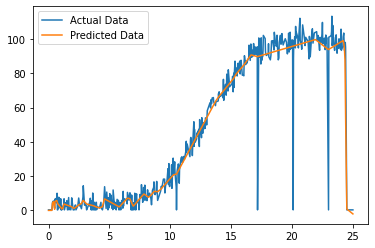

In [8]:
plt.plot(powerData[['speed']],powerData[['power']], label='Actual Data') 
plt.plot(powerData[['speed']],model.predict(powerData[['speed']]), 
label='Predicted Data') 
plt.legend(); 
plt.show();

#### References 
- Keras Models - https://keras.io/guides/sequential_model/


- Keras Optimizers - https://keras.io/api/optimizers/


- Tensorflow Load CSV- https://www.tensorflow.org/tutorials/load_data/csv


- Tensorflow Model Functions - https://www.tensorflow.org/api_docs/python/tf/keras/models#functions


- Lab Videos - https://learnonline.gmit.ie/course/view.php?id=1122


- Activation Layers - https://www.analyticsvidhya.com/blog/2020/01/fundamentals-deep-learning-activation-functions-when-to-use-them/


- Wind Turbines - https://www.energy.gov/eere/wind/how-do-wind-turbines-work#:~:text=Wind%20turbines%20work%20on%20a,a%20generator%2C%20which%20creates%20electricity.